In [1]:
import pandas as pd

In [2]:
dftry2 = pd.read_csv("posts_st.txt",
                    sep = '|',
                    names = ['AUTHOR','ID','SCORE','CREATED_DATE','TITLE','NUM_COMMENTS','SELFTEXT'],
                    header=None, lineterminator = "\n")

In [3]:
dftry2.sort_values(by=['SCORE'],ascending=False)

,AUTHOR,ID,SCORE,CREATED_DATE,TITLE,NUM_COMMENTS,SELFTEXT
43395,Floker1,cdwiln,24310,2019-07-16,Imagine Mike and Nancy finding out that all th...,718,NaN
43139,Utgoffalec,cees1t,21899,2019-07-17,Hi! My name is Alec Utgoff and I play Dr. Alex...,1659,You can follow me on Twitter @AlecUtgoff and I...
42027,coloredneon,cibkdz,16975,2019-07-27,Wills storyline doesnt seem to be about sexual...,813,I keep seeing posts and comments about Wills s...
43275,brettcliffordgelman,ce4jk4,13026,2019-07-16,Im Brett Gelman aka Murray from Stranger Thing...,1225,Hi Reddit! Brett Gelman here. Im an actor and ...
45096,AndreyIvchenko,cbiolx,10260,2019-07-10,"Hello Reddit family, it's Andrey Ivchenko here...",1114,Really excited to be here with you all today f...
...,...,...,...,...,...,...,...
62402,lendmeahann,4y0nsh,0,2016-08-16,A thought I've had since watching...,5,"This isn't necessarily a theory, but I had thi..."
33978,AnyAd8934,m4etve,0,2021-03-13,Things I would like to see in season 4,4,"Keith-yes,he works now at that video store,he ..."
45055,Pronay7,cbkeea,0,2019-07-10,I think they will link the mysteries of the St...,0,NaN
62406,[deleted],4y0en0,0,2016-08-16,The sherif,0,[deleted]


In [4]:
dftry2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65507 entries, 0 to 65506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AUTHOR        65507 non-null  object
 1   ID            65507 non-null  object
 2   SCORE         65507 non-null  int64 
 3   CREATED_DATE  65507 non-null  object
 4   TITLE         65473 non-null  object
 5   NUM_COMMENTS  65494 non-null  object
 6   SELFTEXT      64029 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.5+ MB


### Removing where the title or the selftext are null and removing the posts where the moderator for the Subreddit deleted/removed the post or the original author deleted/removed the post.

In [5]:
dftry2.dropna(subset=['TITLE'], inplace = True)
dftry2.dropna(subset=['SELFTEXT'], inplace = True)
df_touse = dftry2[dftry2['SELFTEXT'] != "[removed]"].copy()
df_to_use_fin = df_touse[df_touse['SELFTEXT'] != "[deleted]"].copy()
df_to_use_fin['FULL_POSTS'] = df_to_use_fin['TITLE']+"."+" "+df_touse['SELFTEXT']

In [6]:
df_to_use_fin.shape

(43302, 8)

In [7]:
check = df_to_use_fin[df_to_use_fin['ID'] == 'vow5wm']
#check = dftry[dftry['ID'] == '7pzv67']

In [8]:
check

,AUTHOR,ID,SCORE,CREATED_DATE,TITLE,NUM_COMMENTS,SELFTEXT,FULL_POSTS
15179,StrangerTesting,vow5wm,1,2022-07-01,Stranger Things Season 4 Volume 2 Series Discu...,1,# In this thread you can discuss the entirety ...,Stranger Things Season 4 Volume 2 Series Discu...


In [9]:
len(df_to_use_fin.ID.unique())

43302

In [10]:
df_to_use_fin['CREATED_DATE'] = pd.to_datetime(df_to_use_fin['CREATED_DATE'])

### Only keeping posts from the release date of season 3 to current

In [11]:
df_to_use_fin = df_to_use_fin[df_to_use_fin['CREATED_DATE']> "2019-07-04"].copy()

In [12]:
df_to_use_fin.shape

(31643, 8)

In [13]:
df_to_use_fin

,AUTHOR,ID,SCORE,CREATED_DATE,TITLE,NUM_COMMENTS,SELFTEXT,FULL_POSTS
1,Lower-Adhesiveness-3,y1yfqt,1,2022-10-12,"The upsidedown turns on Vecna, can he survive?",1,For some reason Vecna loses all his control ov...,"The upsidedown turns on Vecna, can he survive?..."
2,mrs_bombastic22,y1yf6g,1,2022-10-12,Season 4 rewatch - 2 questions,1,When 001 went on his killing spree in the lab....,Season 4 rewatch - 2 questions. When 001 went ...
8,ReliefComplex4339,y1sa5w,1,2022-10-12,Dear Billy and Vecna,1,So by episode 2-3 the kids were already convin...,Dear Billy and Vecna. So by episode 2-3 the ki...
9,EstablishmentWild263,y1s62k,1,2022-10-12,The Demogorgon(S1) is the child of Vecna,1,After four seasons Ive noticed the secon...,The Demogorgon(S1) is the child of Vecna. ...
12,Lrac247,y1qzzh,1,2022-10-12,Anyone like my new creation?,1,&amp;#x200B;https://preview.redd.it/67sxlhr77a...,Anyone like my new creation?. &amp;#x200B;http...
...,...,...,...,...,...,...,...,...
48331,embarrassingaf123,c99gpu,9,2019-07-05,"Next time I have a relationship struggle, I'm ...",8,This guy seems to just work,"Next time I have a relationship struggle, I'm ..."
48333,Aseph88,c99g2p,1,2019-07-05,[minor spoilers]Thought Kline's sign looked fa...,0,Sorry for getting political but couldnt help b...,[minor spoilers]Thought Kline's sign looked fa...
48334,Imperial3agle,c99fxn,1,2019-07-05,[No Spoilers] How sure are we that there will ...,10,"By the way, I have only seen the first 4 episo...",[No Spoilers] How sure are we that there will ...
48335,dudeRedditSucksNow,c99ft9,1,2019-07-05,"In episode 2 where Joyce is watching Friends, ...",2,We can confirm an exact timeline of the show u...,"In episode 2 where Joyce is watching Friends, ..."


In [14]:
import spacy
from spacy import displacy

In [15]:
#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import en_core_web_sm
#nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm')

In [17]:
# Text Cleaning Function
import re

def clean(text):
    allowed_postags=["NOUN", "VERB", "ADJ", "ADV", "ADP", "PROPN"]
    
    try: 
        text1 = re.sub(r"http\S+", "", text)
        #Convert text in lower case
        text2 = text1.lower()
        #text3 = text2.replace("[^a-zA-Z#]", " ")
        #Removing Punctuations
        punc_removed = text2.translate(str.maketrans('', '', string.punctuation))
        doc= nlp(punc_removed)
        text_out = [token.lemma_ for token in doc if token.is_stop == False and \
                    token.is_alpha and len(token)>2 and token.pos_ in allowed_postags\
                   ]
        #txt = ' '.join(text_out)
    except:
        #txt = ''
        text_out = ''
    return text_out

In [18]:
df_to_use_fin['token_lemma'] = df_to_use_fin['FULL_POSTS'].apply(clean)

In [19]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def polarity(text):
    pol = sid.polarity_scores(text)
    return pol
#polarity checking
def joiner(text):
    txt = ' '.join(text)
    return txt
df_to_use_fin['FULL_POSTS_CLEAN'] = df_to_use_fin['token_lemma'].apply(joiner)
df_to_use_fin['polarity'] = df_to_use_fin['FULL_POSTS_CLEAN'].apply(polarity)
df_to_use_fin['compound']  = df_to_use_fin['polarity'].apply(lambda score_dict: score_dict['compound'])

df_to_use_fin['sentiment'] = df_to_use_fin['compound'].apply(lambda x: "Positive" if x>0 else("Negative" if x<0 else "Neutral") )
print("polarity checked successfull")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jacquelineskunda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


polarity checked successfull


In [20]:
df_to_use_fin.shape

(31643, 13)

### Remove posts where the tokenized and lemmatized title+selftext, aka POSTS, have a length less than 5.

In [21]:
df_to_use_fin['tok_len'] = df_to_use_fin['token_lemma'].apply(lambda x: len(x))
df_to_use_fin.groupby(['tok_len'])['tok_len'].count()#[48310]
df_to_use_fin = df_to_use_fin[df_to_use_fin['tok_len']>=5].copy()
df_to_use_fin.shape

(30660, 14)

In [22]:
df_to_use_fin.head(2)

,AUTHOR,ID,SCORE,CREATED_DATE,TITLE,NUM_COMMENTS,SELFTEXT,FULL_POSTS,token_lemma,FULL_POSTS_CLEAN,polarity,compound,sentiment,tok_len
1,Lower-Adhesiveness-3,y1yfqt,1,2022-10-12,"The upsidedown turns on Vecna, can he survive?",1,For some reason Vecna loses all his control ov...,"The upsidedown turns on Vecna, can he survive?...","[upsidedown, turn, vecna, survive, reason, vec...",upsidedown turn vecna survive reason vecna los...,"{'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'comp...",-0.8720,Negative,23
2,mrs_bombastic22,y1yf6g,1,2022-10-12,Season 4 rewatch - 2 questions,1,When 001 went on his killing spree in the lab....,Season 4 rewatch - 2 questions. When 001 went ...,"[season, rewatch, question, go, killing, spree...",season rewatch question go killing spree lab k...,"{'neg': 0.503, 'neu': 0.497, 'pos': 0.0, 'comp...",-0.8779,Negative,11


## Non Negative Matrix Factorization

In [24]:
RANDOM_SEED = 655

In [25]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import seaborn as sns

# import the dataset from sklearn
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# import other required libs
import pandas as pd

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

#metrics and etc
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [26]:
df = df_to_use_fin.copy()
df.head(1)

,AUTHOR,ID,SCORE,CREATED_DATE,TITLE,NUM_COMMENTS,SELFTEXT,FULL_POSTS,token_lemma,FULL_POSTS_CLEAN,polarity,compound,sentiment,tok_len
1,Lower-Adhesiveness-3,y1yfqt,1,2022-10-12,"The upsidedown turns on Vecna, can he survive?",1,For some reason Vecna loses all his control ov...,"The upsidedown turns on Vecna, can he survive?...","[upsidedown, turn, vecna, survive, reason, vec...",upsidedown turn vecna survive reason vecna los...,"{'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'comp...",-0.872,Negative,23


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
tf_idf_vectorizer = TfidfVectorizer(max_features=20000, min_df=10) #1
tf_idf = tf_idf_vectorizer.fit_transform(df_to_use_fin['FULL_POSTS_CLEAN']) #2
#tf_idf_array = tf_idf.toarray() 
X = pd.DataFrame(tf_idf.toarray(),columns=tf_idf_vectorizer.get_feature_names_out())#4

In [28]:
X.shape

(30660, 6205)

In [29]:
#Trying NMF on just 10 topics with basic parameters
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=10, random_state=RANDOM_SEED)
 
# Fit the model to TF-IDF
model.fit(tf_idf)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(tf_idf)

/usr/local/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [30]:
nmf_features.shape

(30660, 10)

In [31]:
model.components_.shape

(10, 6205)

In [32]:
components_df = pd.DataFrame(model.components_, columns=tf_idf_vectorizer.get_feature_names())
components_df

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abduct,abduction,ability,able,abnormal,abomination,abrupt,abruptly,absence,...,youth,youtube,youtuber,yuri,yuris,zap,zombie,zone,zoom,zoomer
0,0.000000,0.000000,0.000000,0.000000,0.041512,0.000000,0.000000,0.000000,0.000000e+00,0.001860,...,0.000000,0.013834,0.000000,0.000000,0.000000,0.000000,0.000000,0.007931,0.000000,0.000036
1,0.002545,0.000000,0.002577,0.045405,0.024546,0.000102,0.004553,0.000000,4.778247e-04,0.002820,...,0.001506,0.000000,0.000000,0.000000,0.000000,0.000195,0.011448,0.000000,0.000000,0.000227
2,0.000000,0.013844,0.000819,0.085204,0.097155,0.001754,0.000000,0.000000,3.051545e-04,0.000685,...,0.000000,0.000000,0.004194,0.000000,0.000509,0.000000,0.000000,0.000000,0.004161,0.000000
3,0.000328,0.002160,0.000000,0.001599,0.000000,0.001288,0.000706,0.000000,0.000000e+00,0.000499,...,0.000218,0.052714,0.008938,0.000000,0.000967,0.000000,0.006318,0.003255,0.002311,0.000000
4,0.006913,0.001194,0.000000,0.000000,0.019531,0.000000,0.000342,0.000000,0.000000e+00,0.001738,...,0.000000,0.000934,0.001486,0.038945,0.003965,0.006955,0.003852,0.001731,0.007652,0.000180
5,0.000000,0.000000,0.000000,0.000000,0.008907,0.000000,0.000000,0.000000,4.796296e-07,0.000000,...,0.004058,0.045972,0.000000,0.000526,0.000000,0.008539,0.001263,0.002463,0.004147,0.000000
6,0.003570,0.000000,0.000000,0.000000,0.008257,0.000000,0.000000,0.005281,1.103637e-03,0.002412,...,0.000000,0.000000,0.000000,0.003734,0.000798,0.000000,0.000000,0.000000,0.000000,0.000272
7,0.006592,0.000000,0.000000,0.000000,0.000000,0.000645,0.003741,0.000000,1.823314e-03,0.006137,...,0.000000,0.000000,0.000000,0.029501,0.000000,0.000000,0.002318,0.000000,0.000000,0.000169
8,0.017108,0.007403,0.001189,0.046372,0.087922,0.001265,0.001313,0.002276,2.008793e-03,0.004270,...,0.004844,0.010969,0.000000,0.004816,0.000029,0.000000,0.018604,0.009473,0.006571,0.005248
9,0.007451,0.012407,0.006424,0.105463,0.266319,0.001130,0.000608,0.000966,8.924901e-04,0.001298,...,0.001233,0.000000,0.000000,0.000000,0.000035,0.001518,0.003479,0.005744,0.002980,0.000000


In [33]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
season     5.448604
episode    0.918254
watch      0.778134
end        0.537894
good       0.434750
release    0.376154
think      0.375202
finish     0.370733
time       0.342504
new        0.307801
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
mind       2.590619
flayer     2.562181
billy      0.401938
control    0.329030
monster    0.265460
form       0.185981
hive       0.151228
flay       0.151105
human      0.135448
create     0.132393
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
vecna     3.345580
kill      0.764863
max       0.739547
think     0.627203
theory    0.596514
power     0.570444
victim    0.297155
die       0.277801
eddie     0.265225
henry     0.250669
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
thing       2.655268
strange     2.438979
watch       0.816778
stranger    0.561598
game        0.259764
good        0.212300
netfli

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### NMF looks like it is producing clearer topics than LDA, lets hyper parameter tune.

In [63]:
##https://www.kaggle.com/code/akashram/topic-modeling-intro-implementation/notebook#Non-Negative-Matrix-Factorization

In [37]:
from gensim.models import Word2Vec

In [87]:
w2v_model = Word2Vec(df_to_use_fin['token_lemma'], vector_size=5000, min_count=20)


In [110]:
kcluster=[4,6,8,10,12,20]

topic_models = []
# try each value of k
for k in kcluster:
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = NMF(max_iter=2000,init="nndsvd", n_components=k,random_state = RANDOM_SEED) 
    W = model.fit_transform(tf_idf)
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )


Applying NMF for k=4 ...
Applying NMF for k=6 ...
Applying NMF for k=8 ...
Applying NMF for k=10 ...
Applying NMF for k=12 ...
Applying NMF for k=20 ...


In [111]:
def get_descriptor(all_terms, H, topic_index, top):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append(all_terms[term_index])
    return top_terms

In [112]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            #print(str(pair[0]) + " " + str(pair[1]))
            pair_scores.append(w2v_model.wv.similarity(pair[0], pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [113]:
#term_rankings

In [114]:
from itertools import combinations

k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        terms = tf_idf_vectorizer.get_feature_names_out()
        term_rankings.append(get_descriptor(terms, H, topic_index, 10))
        #print(term_rankings)
    # Now calculate the coherence based on our Word2vec model
    k_values.append(k)
    coherences.append(calculate_coherence(w2v_model,term_rankings))
    print("K=%02d: Coherence=%.4f" % (k, coherences[-1]))

K=04: Coherence=0.2196
K=06: Coherence=0.2340
K=08: Coherence=0.2996
K=10: Coherence=0.3133
K=12: Coherence=0.3181
K=20: Coherence=0.3511


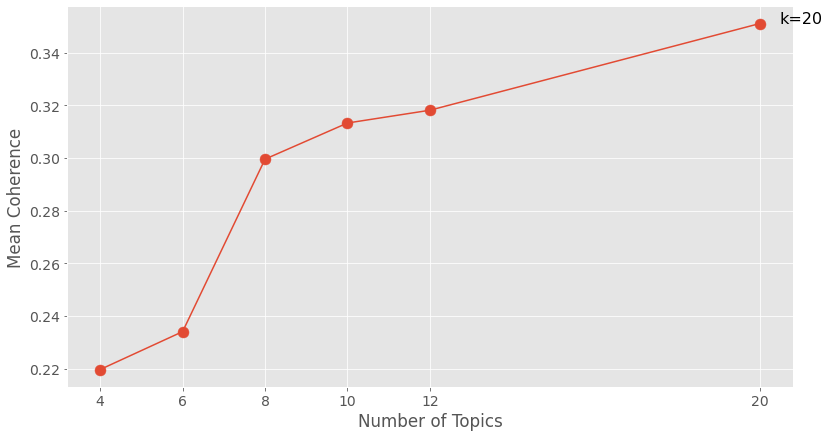

In [115]:
import matplotlib
%matplotlib inline
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [127]:
from gensim import corpora
from gensim.models import Nmf
from gensim.models.coherencemodel import CoherenceModel

In [128]:
texts = df_to_use_fin['token_lemma']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = corpora.Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 30, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )

    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics)